Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` and that you delete any **raise NotImplementedError()** once you have filled in your code. Enter your student identifier below:

In [ ]:
STUDENT ID = "200878566"

# MTH786U/P final assessment template

This is the coding template for the final assessment of MTH786U/P in 2020/2021.

The goal of this assessment is to classify hand-written digits from the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) and to present your results in a written report (at most 8 pages). The assessment is formed of three parts: 1) filling in the missing parts of this Jupyter notebook, 2) applying learned concepts from this notebook and the module MTH786 in general to the MNIST classification problem, and 3) presenting your results in a written report (written in $\LaTeX$). 

Author: [Martin Benning](mailto:m.benning@qmul.ac.uk)

Date: 18.11.2020

Follow the instructions in this template in order to complete the first part of your assessment. Please only modify cells where you are instructed to do so. Failure to comply may result in unexpected errors that can lead to mark deductions. We load the Numpy and Matplotlib libraries. Please do not add any additional libraries here but at a later stage if required.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

## Binary logistic regression

For the first part of your final assessment you are required to implement the logistic regression model for binary classification problems as introduced in the lectures. Following up on what you have learned in the lectures and tutorials, complete the following tasks.

Write a function ***logistic_function*** that takes an argument named _inputs_ and returns the output of the logistic function, i.e.

\begin{align*}
\frac{1}{1 + \exp(-x)} \, ,
\end{align*}

applied to the input. Here $x$ is the mathematical notation for the argument _inputs_.

In [7]:
def logistic_function(inputs):
    # YOUR CODE HERE
    value = 1/(1+np.exp(-(inputs)))
    return value

Test your function with the following unit tests. Passing this test will be awarded with **2 marks**. Please note that not all unit tests are visible to you.

In [8]:
from numpy.testing import assert_array_almost_equal, assert_array_equal
test_inputs = np.array([[0], [np.log(5)], [-3], [np.log(3)], [1]])
assert_array_almost_equal(logistic_function(test_inputs), np.array([[1/2], [5/6], [0.04742587317756], \
                            [3/4], [np.exp(1)/(1 + np.exp(1))]]))

For the next exercise, write two functions that implement the objective function for binary logistic regression as well as its gradient, as defined in the lecture notes. The function for the objective function is named **binary_logistic_regression_cost_function** and should take the NumPy arrays _data_matrix_, _weights_ and _outputs_ as arguments. Here, _data_matrix_ is supposed to be a polynomial basis matrix, while _weights_ denotes the vector of weight parameters and _outputs_ is the vector of binary outputs (with values in $\{0, 1\}$). In order to generate a polynomial basis matrix, fill in the function **polynomial_basis**. You can follow the [solution](https://qmplus.qmul.ac.uk/mod/resource/view.php?id=1416413) of [Coursework 4](https://qmplus.qmul.ac.uk/pluginfile.php/2220881/mod_resource/content/4/coursework04.pdf) or use your own version, as long as it is consistent with the function header specified in the next cell and with the requested output. Subsequently, write a method **binary_logistic_regression_gradient** that takes the same inputs as **binary_logistic_regression_cost_function** and computes the gradient of the binary logistic regression cost function as defined in the lecture.

In [9]:
def polynomial_basis(inputs, degree=1):
    
    basis_matrix = np.ones((len(inputs), 1))
    for counter in range(1, degree + 1):
        basis_matrix = np.c_[basis_matrix, np.power(inputs, counter)]
    return basis_matrix
   

def binary_logistic_regression_cost_function(data_matrix, weights, outputs):
    s = data_matrix.shape[0]
    values = []
    for i in range(s):
        result = np.log(1 + np.exp(data_matrix[i,:]@weights)) - (outputs[i]*(data_matrix[i,:]@weights))
        values.append(result)
    return np.sum(values)
    
    
def binary_logistic_regression_gradient(data_matrix, weights, outputs):
    result = data_matrix.T @ (logistic_function(data_matrix@weights) - outputs)
    return result



After writing Python functions for the binary logistic regression cost function and its gradient, fill in the following notebook functions for the implementation of a gradient descent method. For the first function it is acceptable to follow the solution of Coursework 6, or to use your own version if is consistent with function header and output. For the second gradient descent function named **gradient_descent_v2**, modify the gradient descent method to include a stopping criterion that ensures that gradient descent stops once

\begin{align*}
\| \nabla L(w^k) \| \leq \text{tolerance}
\end{align*}

is satisfied. Here $L$ and $w^k$ are the mathematical representations of the objective _objective_ and the weight vector _weights_, at iteration $k$. The parameter _tolerance_ is a non-negative threshold that controls the Euclidean norm of the gradient. The function **gradient_descent_v2** takes the arguments _objective_, _gradient_, _initial_weights_, _step_size_, _no_of_iterations_, _print_output_ and _tolerance_. The arguments _objective_ and _gradient_ are functions that can take (weight-)arrays as arguments and return the scalar value of the objective, respectively the array representation of the corresponding gradient. The argument _initial_weights_ specifies the initial value of the variable over which you iterate. The argument _step_size_ is the gradient descent step-size parameter, the argument _no_of_iterations_ specifies the maximum number of iterations, _print_output_ determines after how many iterations the function produces a text output and _tolerance_ controls the norm of the gradient as described in the equation above.

In [10]:
def gradient_descent(objective, gradient, initial_weights, step_size=1, no_of_iterations=100, print_output=10):
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
            
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    
    return weights, objective_values

    
def gradient_descent_v2(objective, gradient, initial_weights, step_size=1, no_of_iterations=100, \
                        print_output=10, tolerance=1e-6):
    
    #This creates values for the cost function for each weight
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    iteration = 0
    #This enforces a condition on the one norm of the gradient of the loss function
    while np.sum(np.abs(gradient(weights))) < tolerance:
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        
        iteration +=1
        if (iteration + 1) % print_output == 0:
            print("Iteration {k}, objective = {o}.".format(k=iteration+1, \
                     o=objective_values[iteration]))
            
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=iteration + 1, \
                 o=objective_values[iteration]))
    
    return weights, objective_values


In the following cell, write a function **standardise** that standardises the columns of a two-dimensional NumPy array _data_matrix_.

In [11]:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix,axis = 0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis = 0)
  
    return (standardised_matrix/row_of_stds)


Test your results with the following cell. A total of **3 marks** will be awarded if your function passes the following standard tests. Please note that not all tests are visible to you.

In [12]:
test_matrix = np.array([[1, 2], [3, 4], [5, 6]])
assert_array_almost_equal(standardise(test_matrix), np.array([[-1.22474487, -1.22474487], \
                            [0, 0],[1.22474487, 1.22474487]]))

To train a simple binary classifier, you require some data. The following cell calls a function that allows you to load the height-weight-gender dataset that you already know from your coursework.

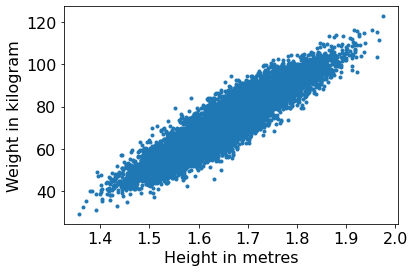

In [13]:
from data_loader import load_data
height, weight, biological_sex = load_data()
biological_sex = np.double(biological_sex).reshape(-1, 1)
plt.plot(height, weight, '.', linewidth=3)
plt.xlabel('Height in metres', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight in kilogram', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

In the following cell, write code that initialises a polynomial data matrix _data_matrix_ of degree one with the standardised inputs formed from the height and weight arrays of the dataset. Define an objective function _objective_ with argument _weights_ based on the **binary_logistic_regression_cost_function** with fixed arguments _data_matrix_ and _biological_sex_. Repeat the same exercise to create a function _gradient_ based on **binary_logistic_regression_gradient**.

In [14]:

#creating the polynomial basis array
height_standardised = standardise(height)
weight_standardised = standardise(weight)
weight_height_std = np.c_[height_standardised,weight_standardised]
data_matrix = polynomial_basis(weight_height_std)
#checking the polynomial array
print(data_matrix)

#creating the cost function and gradient
objective = lambda weights: binary_logistic_regression_cost_function(data_matrix, weights, biological_sex)
gradient = lambda weights: binary_logistic_regression_gradient(data_matrix, weights, biological_sex)


 

[[ 1.          1.94406149  2.50579697]
 [ 1.          0.62753668  0.02710064]
 [ 1.          2.01244346  1.59780623]
 ...
 [ 1.         -0.64968792 -1.02672965]
 [ 1.          0.69312469  0.07512745]
 [ 1.         -1.14970831 -1.48850724]]


Call gradient descent with the following cell to compute _optimal_weights_ for your model.

In [15]:
initial_weights = np.zeros((data_matrix.shape[1], 1))
optimal_weights, objective_values = gradient_descent(objective, gradient, initial_weights, \
                                    step_size=1.9/(np.linalg.norm(data_matrix, 2) ** 2), \
                                    no_of_iterations=7000, print_output=1000)

Iteration 1000/7000, objective = 2091.9568591203943.
Iteration 2000/7000, objective = 2091.30072155257.
Iteration 3000/7000, objective = 2091.297983425523.
Iteration 4000/7000, objective = 2091.2979712556394.
Iteration 5000/7000, objective = 2091.2979712013266.
Iteration 6000/7000, objective = 2091.297971201084.
Iteration 7000/7000, objective = 2091.297971201083.
Iteration completed after 7000/7000, objective = 2091.297971201083.


A correct result of your gradient-descent-based logistic regression strategy will be awarded **4 marks**.

In [16]:
print("The optimal weights are w = {w}.T with objective value L(w) = {o}.".format(w = optimal_weights.T, \
        o=objective_values[-1]))

The optimal weights are w = [[-0.01870311  1.89527459 -6.3680829 ]].T with objective value L(w) = 2091.297971201083.


Write two functions **prediction_function** and **classification_accuracy** that turn your predicitons into classification results and that compare how many labels have been classified correctly. The function **prediction_function** takes the arguments _data_matrix_ and _weights_ as inputs and returns a vector of class labels with binary values in $\{0, 1\}$ as its output. The function **classification_accuracy** takes two inputs _true_labels_ and _recovered_labels_ and returns the percentage of correctly classified labels divided by 100.

In [17]:
def prediction_function(data_matrix, weights):
    results = logistic_function(data_matrix @ weights)
    binary = np.where(results >0.5,1,0)
    return binary
   
def classification_accuracy(true_labels, recovered_labels):
    equal_labels = (recovered_labels == true_labels)
    return np.mean(equal_labels)
  

The correct classification accuracy is awarded **4 marks**. The total marks possible in this section are **13 marks**.

In [18]:
print("The classification accuracy for the training set is {p} %.".format(p = 100 * \
        classification_accuracy(biological_sex, prediction_function(data_matrix, optimal_weights))))

The classification accuracy for the training set is 91.94 %.


## Multinomial logistic regression

This concludes the binary classification part of the first part of the final assessment. We now move on to multinomial logistic regression for multi-class classfication problems. As a first exercise, implement the softmax function **softmax_function** as defined in the lectures. The function takes the NumPy array _argument_ as its main argument, but also has an optional _axis_ argument to determine across which array-dimension you apply the softmax operation. If this argument is not specified (or set to _None_), then the softmax operation is applied to the entire array. Make sure your function works at least for NumPy arrays _argument_ with arbitrary numerical values and dimension one or two.

In [19]:
def softmax_function(argument, axis=None):
    
    if argument.ndim == 1:
        new_array = np.exp(argument)
        result = new_array/np.sum(new_array)
        
        return result
    elif argument.ndim > 1:
        
        if axis == None:
            result = np.exp(argument)/sum(sum(np.exp(x)) for x in argument)
            
            return result
        
        elif axis == 0:
            new_array = np.exp(argument)
            result = new_array/new_array.sum(axis=0, keepdims = True)
            
            return result
                
        elif axis == 1:
            new_array = np.exp(argument)
            result = new_array/new_array.sum(axis=1, keepdims = True)
          
            return result
    
print(softmax_function(np.array([[1.5,3], [0.3,-0.7], [-3.7,2]]),axis=0))

[[0.76528029 0.71807976]
 [0.23049799 0.01775346]
 [0.00422172 0.26416678]]


Test your softmax function with the following cell. Passing this test is awarded with **4 marks**. Please note that, as usual, some tests are hidden.

In [20]:
argument = np.array([[1.5], [0.3], [-3.7]])
print("The softmax of {arg}.T is {out}.T.".format(arg=argument.T, out=softmax_function(argument).T))
assert_array_almost_equal(softmax_function(np.array([[1.5], [0.3], [-3.7]])), np.array([[0.76528029], \
                                                        [0.23049799], [0.00422172]]))
assert_array_almost_equal(softmax_function(np.array([[1.5, 3], [0.3, -0.7], [-3.7, 2]]), axis=0), \
                          np.array([[0.76528029, 0.71807976], [0.23049799, 0.01775346], \
                                    [0.00422172, 0.26416678]]))

The softmax of [[ 1.5  0.3 -3.7]].T is [[0.76528029 0.23049799 0.00422172]].T.


Next, write a function **one_hot_vector_encoding** that converts an NumPy array _labels_ with values in the range of $\{0, K - 1\}$ into so-called one-hot vector encodings. For example, for $K = 3$ and a label vector $\text{labels} = \left( \begin{matrix} 2 & 0 & 1 & 2\end{matrix} \right)^\top$, the output of **one_hot_vector_encoding(labels)** should be a two-dimensional NumPy array of the form

\begin{align*}
\left( \begin{matrix} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{matrix} \right) \, . 
\end{align*}

In [21]:
def one_hot_vector_encoding(labels):
    a = labels
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b   

Implement the cost function and gradient for the multinomial logistic regression in terms of two functions **multinomial_logistic_regression_cost_function** and **multinomial_logistic_regression_gradient**. As in the binary classification case, the arguments are the polynomial data matrix _data_matrix_ and weights that are now named _weight_matrix_. Instead of passing on labels as _outputs_ as in the binary case, you pass the one hot vector encoding representation _one_hot_vector_encodings_ as your third argument. Return the cost function value, respectively the gradient, following the mathematical formulas in the lecture notes.

In [22]:
def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings):
    #loss function
    s = data_matrix.shape[0]
    K = one_hot_vector_encodings.shape[1]
    values = 0
    
    for i in range(s):
        term1s = []
        col = np.where(one_hot_vector_encodings[i,:] == 1)[0][0]
        term2 = (np.dot(data_matrix[i,:],weight_matrix[:,col]))
        for j in range(K): 
            term1_before = (np.exp(np.dot(data_matrix[i,:],weight_matrix[:,j])))                  
            term1s.append(term1_before)
        term1 = np.log((np.sum(term1s)))
        values += term1 - term2
    return values
    
def multinomial_logistic_regression_gradient(data_matrix, weight_matrix, one_hot_vector_encodings):
    result = data_matrix.T @ (softmax_function(data_matrix@weight_matrix,axis = 1) - one_hot_vector_encodings)
    return result

Test your implementation on the [UCI wine dataset](https://archive.ics.uci.edu/ml/datasets/wine); the dataset contains 13 attributes from a chemical analysis of Italian wines from three different cultivars. For more information on the dataset visit [this link](https://archive.ics.uci.edu/ml/datasets/wine). The code in the following cell loads the dataset and stores the labels in a NumPy array _labels_ and the attributes in a NumPy array _inputs_.

In [23]:
wines = np.loadtxt('wine.data', delimiter=',')
labels = wines[:, 0].astype(int) - 1
inputs = wines[:, 1::]

Transform the labels _labels_ into a one hot vector representation with your function **one_hot_vector_encoding** and store your results in a NumPy array named _outputs_.

In [24]:
# YOUR CODE HERE
outputs = one_hot_vector_encoding(labels)

In the following cell, write code that initialises a polynomial data matrix _data_matrix_ of degree one with the standardised inputs _inputs_ from the wine dataset. Define an objective function _objective_ with argument _weight_matrix_ based on the **multinomial_logistic_regression_cost_function** with fixed arguments _data_matrix_ and _one_hot_vector_encodings_. Repeat the same exercise to create a function _gradient_ based on **multinomial_logistic_regression_gradient**.

In [25]:
# YOUR CODE HERE

data_matrix = polynomial_basis(standardise(inputs))

objective = lambda weight_matrix: multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, outputs) 
gradient = lambda weight_matrix: multinomial_logistic_regression_gradient(data_matrix, weight_matrix, outputs)


Call gradient descent with the following cell to compute an _optimal_weight_matrix_ for your model.

In [26]:
initial_weight_matrix = np.zeros((data_matrix.shape[1], outputs.shape[1]))
optimal_weight_matrix, objective_values = gradient_descent(objective, gradient, initial_weight_matrix, \
                                    step_size=1.9/(np.linalg.norm(data_matrix, 2) ** 2), \
                                    no_of_iterations=100000, print_output=5000)

Iteration 5000/100000, objective = 0.37363264592740286.
Iteration 10000/100000, objective = 0.19859836381135887.
Iteration 15000/100000, objective = 0.13605627122241737.
Iteration 20000/100000, objective = 0.10372479744703211.
Iteration 25000/100000, objective = 0.08391801536513466.
Iteration 30000/100000, objective = 0.07051872085948618.
Iteration 35000/100000, objective = 0.06084138658523397.
Iteration 40000/100000, objective = 0.05351961411115225.
Iteration 45000/100000, objective = 0.047784005082136094.
Iteration 50000/100000, objective = 0.04316789618475969.
Iteration 55000/100000, objective = 0.03937164510108371.
Iteration 60000/100000, objective = 0.036193967173282715.
Iteration 65000/100000, objective = 0.0334945959405184.
Iteration 70000/100000, objective = 0.031172765703073146.
Iteration 75000/100000, objective = 0.02915420629986798.
Iteration 80000/100000, objective = 0.027382962414542966.
Iteration 85000/100000, objective = 0.02581606984776652.
Iteration 90000/100000, objec

Write a function **multinomial_prediction_function** that turns your predicitons into labels. The function takes the arguments _data_matrix_ and _weight_matrix_ as inputs and returns a vector of labels with values in $\{0, K - 1 \}$ as its output.

In [27]:
def multinomial_prediction_function(data_matrix, weight_matrix):
    k = weight_matrix.shape[1]
    matrix = logistic_function(data_matrix@weight_matrix)
    ohv_matrix = (matrix == matrix.max(axis=1,keepdims = 1)).astype(float)
    prediction = ohv_matrix @ np.array(np.arange(0,k))
    return prediction

The correct classification accuracy is awarded **4 marks**. The total number of possible marks in this section is **8 marks**.

In [28]:
print("The classification accuracy for the wine training set is {p} %.".format(p = 100 * \
        classification_accuracy(labels, multinomial_prediction_function(data_matrix, optimal_weight_matrix))))

The classification accuracy for the wine training set is 100.0 %.


## Ridge logistic regression

For the next part, modify the multinomial logistic regression problem to include a squared Frobenius norm of the weights as a regularisation term, similar to ridge regression where we added a multiple of the squared Euclidean norm of the weights to the mean squared error. Write two functions **ridge_logistic_regression_cost_function** and **ridge_logistic_regression_gradient** that take the arguments _data_matrix_, _weight_matrix_, _one_hot_vector_encodings_ and _regularisation_parameter_ as inputs. The function **ridge_logistic_regression_cost_function** returns the evulation of the multinomial logistic regression cost function with its linear model being determined by the polynomial basis matrix _data_matrix_ and the weight matrix _weight_matrix_, plus _regularisation_parameter_ times the squared Frobenius norm of _weight_matrix_ divided by two. The function **ridge_logistic_regression_gradient** is supposed to compute the corresponding gradient.

In [29]:
def ridge_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings, \
                                            regularisation_parameter):
    ridge_term = (regularisation_parameter/2) * (np.linalg.norm(weight_matrix)**2)
    return multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings) + ridge_term
    
    
    
def ridge_logistic_regression_gradient(data_matrix, weight_matrix, one_hot_vector_encodings, \
                                       regularisation_parameter):
    ridge_term = regularisation_parameter * weight_matrix
    return multinomial_logistic_regression_gradient(data_matrix,weight_matrix,one_hot_vector_encodings) + ridge_term 


Set your regularisation parameter _regularisation_parameter_ to the value 15 and define an objective function _objective_ as well as a gradient function _gradient_, both with argument _weight_matrix_, for fixed _data_matrix_ and _outputs_ as from the wine dataset that you have used before.

In [30]:
# YOUR CODE HERE
regularisation_parameter = 15
objective = lambda weight_matrix: ridge_logistic_regression_cost_function(data_matrix, weight_matrix, outputs,regularisation_parameter) 
gradient = lambda weight_matrix: ridge_logistic_regression_gradient(data_matrix, weight_matrix, outputs,regularisation_parameter)


Test your solution with the following cell.

In [31]:
initial_weight_matrix = np.zeros((data_matrix.shape[1], outputs.shape[1]))
ridge_weight_matrix, ridge_objective_values = gradient_descent(objective, gradient, initial_weight_matrix, \
                                    step_size=1.9/np.linalg.norm(data_matrix.T @ data_matrix + \
                                    regularisation_parameter * np.eye(data_matrix.shape[1]), 2), \
                                    no_of_iterations=100, print_output=10)

Iteration 10/100, objective = 50.66582189248285.
Iteration 20/100, objective = 48.11155251656332.
Iteration 30/100, objective = 47.8219334972513.
Iteration 40/100, objective = 47.766837844563554.
Iteration 50/100, objective = 47.752421479679114.
Iteration 60/100, objective = 47.747879295725696.
Iteration 70/100, objective = 47.7462923106324.
Iteration 80/100, objective = 47.745701101573275.
Iteration 90/100, objective = 47.74547049334518.
Iteration 100/100, objective = 47.74537725711093.
Iteration completed after 100/100, objective = 47.74537725711093.


The correct classification accuracy is awarded **4 marks**, which is also the total number of possible points in this section.

In [32]:
print("The ridge regression classification accuracy with regularisation parameter {a}".format(a = \
       regularisation_parameter), "for the wine training set is {p} %.".format(p = 100 * \
        classification_accuracy(labels, multinomial_prediction_function(data_matrix, ridge_weight_matrix))))

The ridge regression classification accuracy with regularisation parameter 15 for the wine training set is 99.43820224719101 %.


## LASSO-type logistic regression

As a final exercise before you are left to continue with the main part of your project of classifying handwritten digits, implement a modification of the multinomial logistic regression problem that contains a positive multiple of the one-norm of the weight matrix as regularisation term, and approximate a solution numerically with the proximal gradient descent method as introduced in the lectures. You can make use of computational solutions for coursework 9.

Begin by completing the following three functions. The function **soft_thresholding** takes the two arguments _argument_ and _threshold_ and returns the solution of the soft-thresholding operation applied to _argument_ with threshold _threshold_. 

The function **lasso_logistic_regression_cost_function** is supposed to implement the multinomial logistic regression loss with additional one-norm regularisation for polynomial basis matrix _data_matrix_, weight matrix _weight_matrix_, the one hot vector encoding output _one_hot_vector_encodings_ and the regularisation parameter _regularisation_parameter_.

The function **proximal_gradient_descent** takes the same arguments as the function **gradient_descent**, with additional argument _proximal_map_ in order to specify the proximal map to be used. 

In [33]:
def soft_thresholding(argument, threshold):
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)
    
def lasso_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings, \
                                       regularisation_parameter):
    lasso_term = regularisation_parameter * np.linalg.norm(weight_matrix,1)
    return multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings) + lasso_term
    
def proximal_gradient_descent(objective, gradient, proximal_map, initial_weights, step_size=1, \
                              no_of_iterations=100, print_output=100):
    objective_values = []
    weights = initial_weights    
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights = proximal_map(weights - step_size * gradient(weights))
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

In the next cell, define a suitable objective function _objective_ and a suitable gradient function _gradient_, both with argument _weight_matrix_ and fixed _data_matrix_ and _outputs_ from the wine dataset that you have used before, as well as a suitable proximal map function _proximal_map_ with correctly chosen threshold.

In [34]:
regularisation_parameter = 0.5
step_size = 1.9/(np.linalg.norm(data_matrix, 2) ** 2)
# YOUR CODE HERE

objective = lambda weight_matrix: lasso_logistic_regression_cost_function(data_matrix, weight_matrix, outputs, \
                                       regularisation_parameter)
gradient = lambda weight_matrix: multinomial_logistic_regression_gradient(data_matrix, weight_matrix, outputs)

proximal_map = lambda weights: soft_thresholding(weights, regularisation_parameter * \
                                                 step_size)

Test your solution with the following cell.

In [35]:
initial_weight_matrix = np.zeros((data_matrix.shape[1], outputs.shape[1]))
lasso_weight_matrix, lasso_objective_values = proximal_gradient_descent(objective, gradient, proximal_map, \
                                                initial_weight_matrix, step_size, no_of_iterations=10000, \
                                                print_output=1000)

Iteration 1000/10000, objective = 8.24959786201634.
Iteration 2000/10000, objective = 8.263886291899661.
Iteration 3000/10000, objective = 8.320757757764321.
Iteration 4000/10000, objective = 8.354235362086085.
Iteration 5000/10000, objective = 8.374118326110752.
Iteration 6000/10000, objective = 8.385347232389174.
Iteration 7000/10000, objective = 8.392015832216455.
Iteration 8000/10000, objective = 8.396214878066097.
Iteration 9000/10000, objective = 8.399020949261885.
Iteration 10000/10000, objective = 8.40100378273745.
Iteration completed after 10000/10000, objective = 8.40100378273745.


The correct classification accuracy is awarded **5 marks**, which is also the total number of points available in this section.

In [36]:
print("The lasso classification accuracy with regularisation parameter {a}".format(a = \
       regularisation_parameter), "for the wine training set is {p} %.".format(p = 100 * \
        classification_accuracy(labels, multinomial_prediction_function(data_matrix, lasso_weight_matrix))))

The lasso classification accuracy with regularisation parameter 0.5 for the wine training set is 100.0 %.
